<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/covid-research/Boston_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ROOT = '/content/drive/My Drive/Final-Project-for-CS109a/covid_analysis/'

In [45]:
boston_covid_neighborhood_df = pd.read_csv(DATA_ROOT + 'boston_neighborhood_covid.csv')
boston_covid_neighborhood_df["total positive"] = boston_covid_neighborhood_df["total tested"] * boston_covid_neighborhood_df["cumulative positive"]
boston_covid_neighborhood_df = boston_covid_neighborhood_df.rename(columns={"neigborhood":"neighborhood"})
boston_covid_neighborhood_df.head()


,neighborhood,total tested,cumulative positive,total positive
0,East Boston,19590,0.13600,2664.2400
1,Mattapan,8652,0.11200,969.0240
2,Hyde Park,12726,0.11100,1412.5860
3,Dorchester,48850,0.10751,5251.8635
4,Roslindale,12005,0.08200,984.4100


In [46]:
boston_districts_df = pd.read_excel(DATA_ROOT + 'Boston-Neighborhoods-to-Districts.xlsx')
boston_districts_df

,Unnamed: 0,neighborhood,district
0,0,Allston,D14
1,1,Back Bay,D4
2,2,Beacon Hill,A1
3,3,Brighton,D14
4,4,Charlestown,A15
5,5,Dorchester,C11
6,6,Downtown,A1
7,7,East Boston,A7
8,8,Fenway,D4
9,9,Harbor Islands,NaN


In [47]:
boston_covid_districts = pd.merge(boston_covid_neighborhood_df,boston_districts_df, on="neighborhood").drop(columns=["Unnamed: 0"])
boston_covid_districts

,neighborhood,total tested,cumulative positive,total positive,district
0,East Boston,19590,0.136,2664.240,A7
1,Roslindale,12005,0.082,984.410,E5
2,Roxbury,23736,0.062,1471.632,B2
3,West Roxbury,9356,0.061,570.716,E5
4,South End,20060,0.057,1143.420,D4
5,Jamaica Plain,19720,0.049,966.280,E13
6,South Boston,16450,0.047,773.150,C6
7,Allston,12753,0.042,535.626,D14
8,Brighton,18697,0.042,785.274,D14
9,Charlestown,7060,0.039,275.340,A15


In [48]:
boston_covid_districts = boston_covid_districts.groupby("district").sum()[["total positive","total tested","cumulative positive"]]

In [59]:
boston_crime_df = pd.read_csv(DATA_ROOT + 'boston_crime_2020_latest.csv')
boston_crime_df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [65]:
boston_crime_types_df = boston_crime_df[["DISTRICT","OFFENSE_CODE","OFFENSE_DESCRIPTION","YEAR"]]
boston_crime_types_df = boston_crime_types_df[boston_crime_types_df["YEAR"] == 2020]
boston_crime_types_df.head()

,DISTRICT,OFFENSE_CODE,OFFENSE_DESCRIPTION,YEAR
1,C6,3301,VERBAL DISPUTE,2020
2,E18,2647,THREATS TO DO BODILY HARM,2020
8,B2,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,2020
9,C11,619,LARCENY ALL OTHERS,2020
10,C6,3201,PROPERTY - LOST/ MISSING,2020


In [66]:
boston_crime_covid = pd.merge(boston_crime_types_df,boston_covid_districts, left_on="DISTRICT", right_on="district")
boston_crime_covid.head()

,DISTRICT,OFFENSE_CODE,OFFENSE_DESCRIPTION,YEAR,total positive,total tested,cumulative positive
0,C6,3301,VERBAL DISPUTE,2020,773.15,16450,0.047
1,C6,3201,PROPERTY - LOST/ MISSING,2020,773.15,16450,0.047
2,C6,3115,INVESTIGATE PERSON,2020,773.15,16450,0.047
3,C6,423,ASSAULT - AGGRAVATED,2020,773.15,16450,0.047
4,C6,801,ASSAULT - SIMPLE,2020,773.15,16450,0.047


In [71]:
print(boston_crime_covid["OFFENSE_DESCRIPTION"].sort_values().unique())
boston_crime_covid_by_offense = boston_crime_covid.groupby(["DISTRICT","total positive","total tested","OFFENSE_DESCRIPTION",]).count()["OFFENSE_CODE"].reset_index().rename(columns={"OFFENSE_CODE":"OFFENSE_COUNTS"})
#boston_crime_covid_by_offense.head()


['AFFRAY' 'AIRCRAFT INCIDENTS' 'ANIMAL ABUSE'
 'ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)' 'ARSON'
 'ASSAULT - AGGRAVATED' 'ASSAULT - SIMPLE' 'AUTO THEFT'
 'AUTO THEFT - LEASED/RENTED VEHICLE' 'AUTO THEFT - MOTORCYCLE / SCOOTER'
 'BALLISTICS EVIDENCE/FOUND' 'BIOLOGICAL THREATS' 'BOMB THREAT'
 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE'
 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)'
 'BURGLARY - COMMERICAL' 'BURGLARY - RESIDENTIAL' 'CHILD ENDANGERMENT'
 'CHILD ENDANGERMENT/ABANDONMENT (NO ASSAULT)'
 'CHILD REQUIRING ASSISTANCE (FOMERLY CHINS)'
 'DANGEROUS OR HAZARDOUS CONDITION' 'DEATH INVESTIGATION'
 'DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATHERING CAUSING ANNOYANCE/ NOISY PAR'
 'DRUGS - POSSESSION OF DRUG PARAPHANALIA'
 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EVADING FARE' 'EXPLOSIVES - POSSESSION OR USE'
 'EXPLOSIVES - TURNED IN OR FOUND' 'EXTORTION OR BLACKMAIL' 'FIRE REPORT'
 'FIRE REPORT/ALARM - FALSE' 'FIREARM/WEAPON 

In [72]:
district_crime_covid = boston_crime_covid.groupby(["DISTRICT","total positive","total tested"]).count()["OFFENSE_CODE"].reset_index().rename(columns={"OFFENSE_CODE":"offenses"})
district_crime_covid.head()

,DISTRICT,total positive,total tested,offenses
0,A1,476.523,17649,6597
1,A15,275.340,7060,1458
2,A7,2664.240,19590,3422
3,B2,1471.632,23736,11701
4,C6,773.150,16450,5081


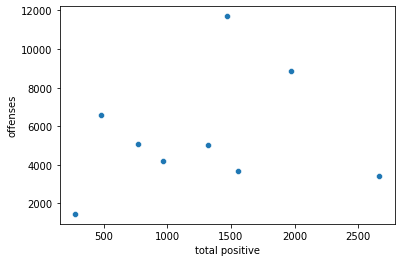

In [73]:
sns.scatterplot(data=district_crime_covid, x="total positive", y="offenses")

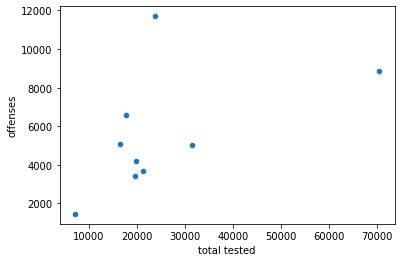

In [74]:
sns.scatterplot(data=district_crime_covid, x="total tested", y="offenses")

In [95]:
district_crime_covid.corr()

,total positive,total tested,offenses
total positive,1.000000,0.485158,0.210508
total tested,0.485158,1.000000,0.522866
offenses,0.210508,0.522866,1.000000


Text(0.5, 0, 'Total Positive Cases')

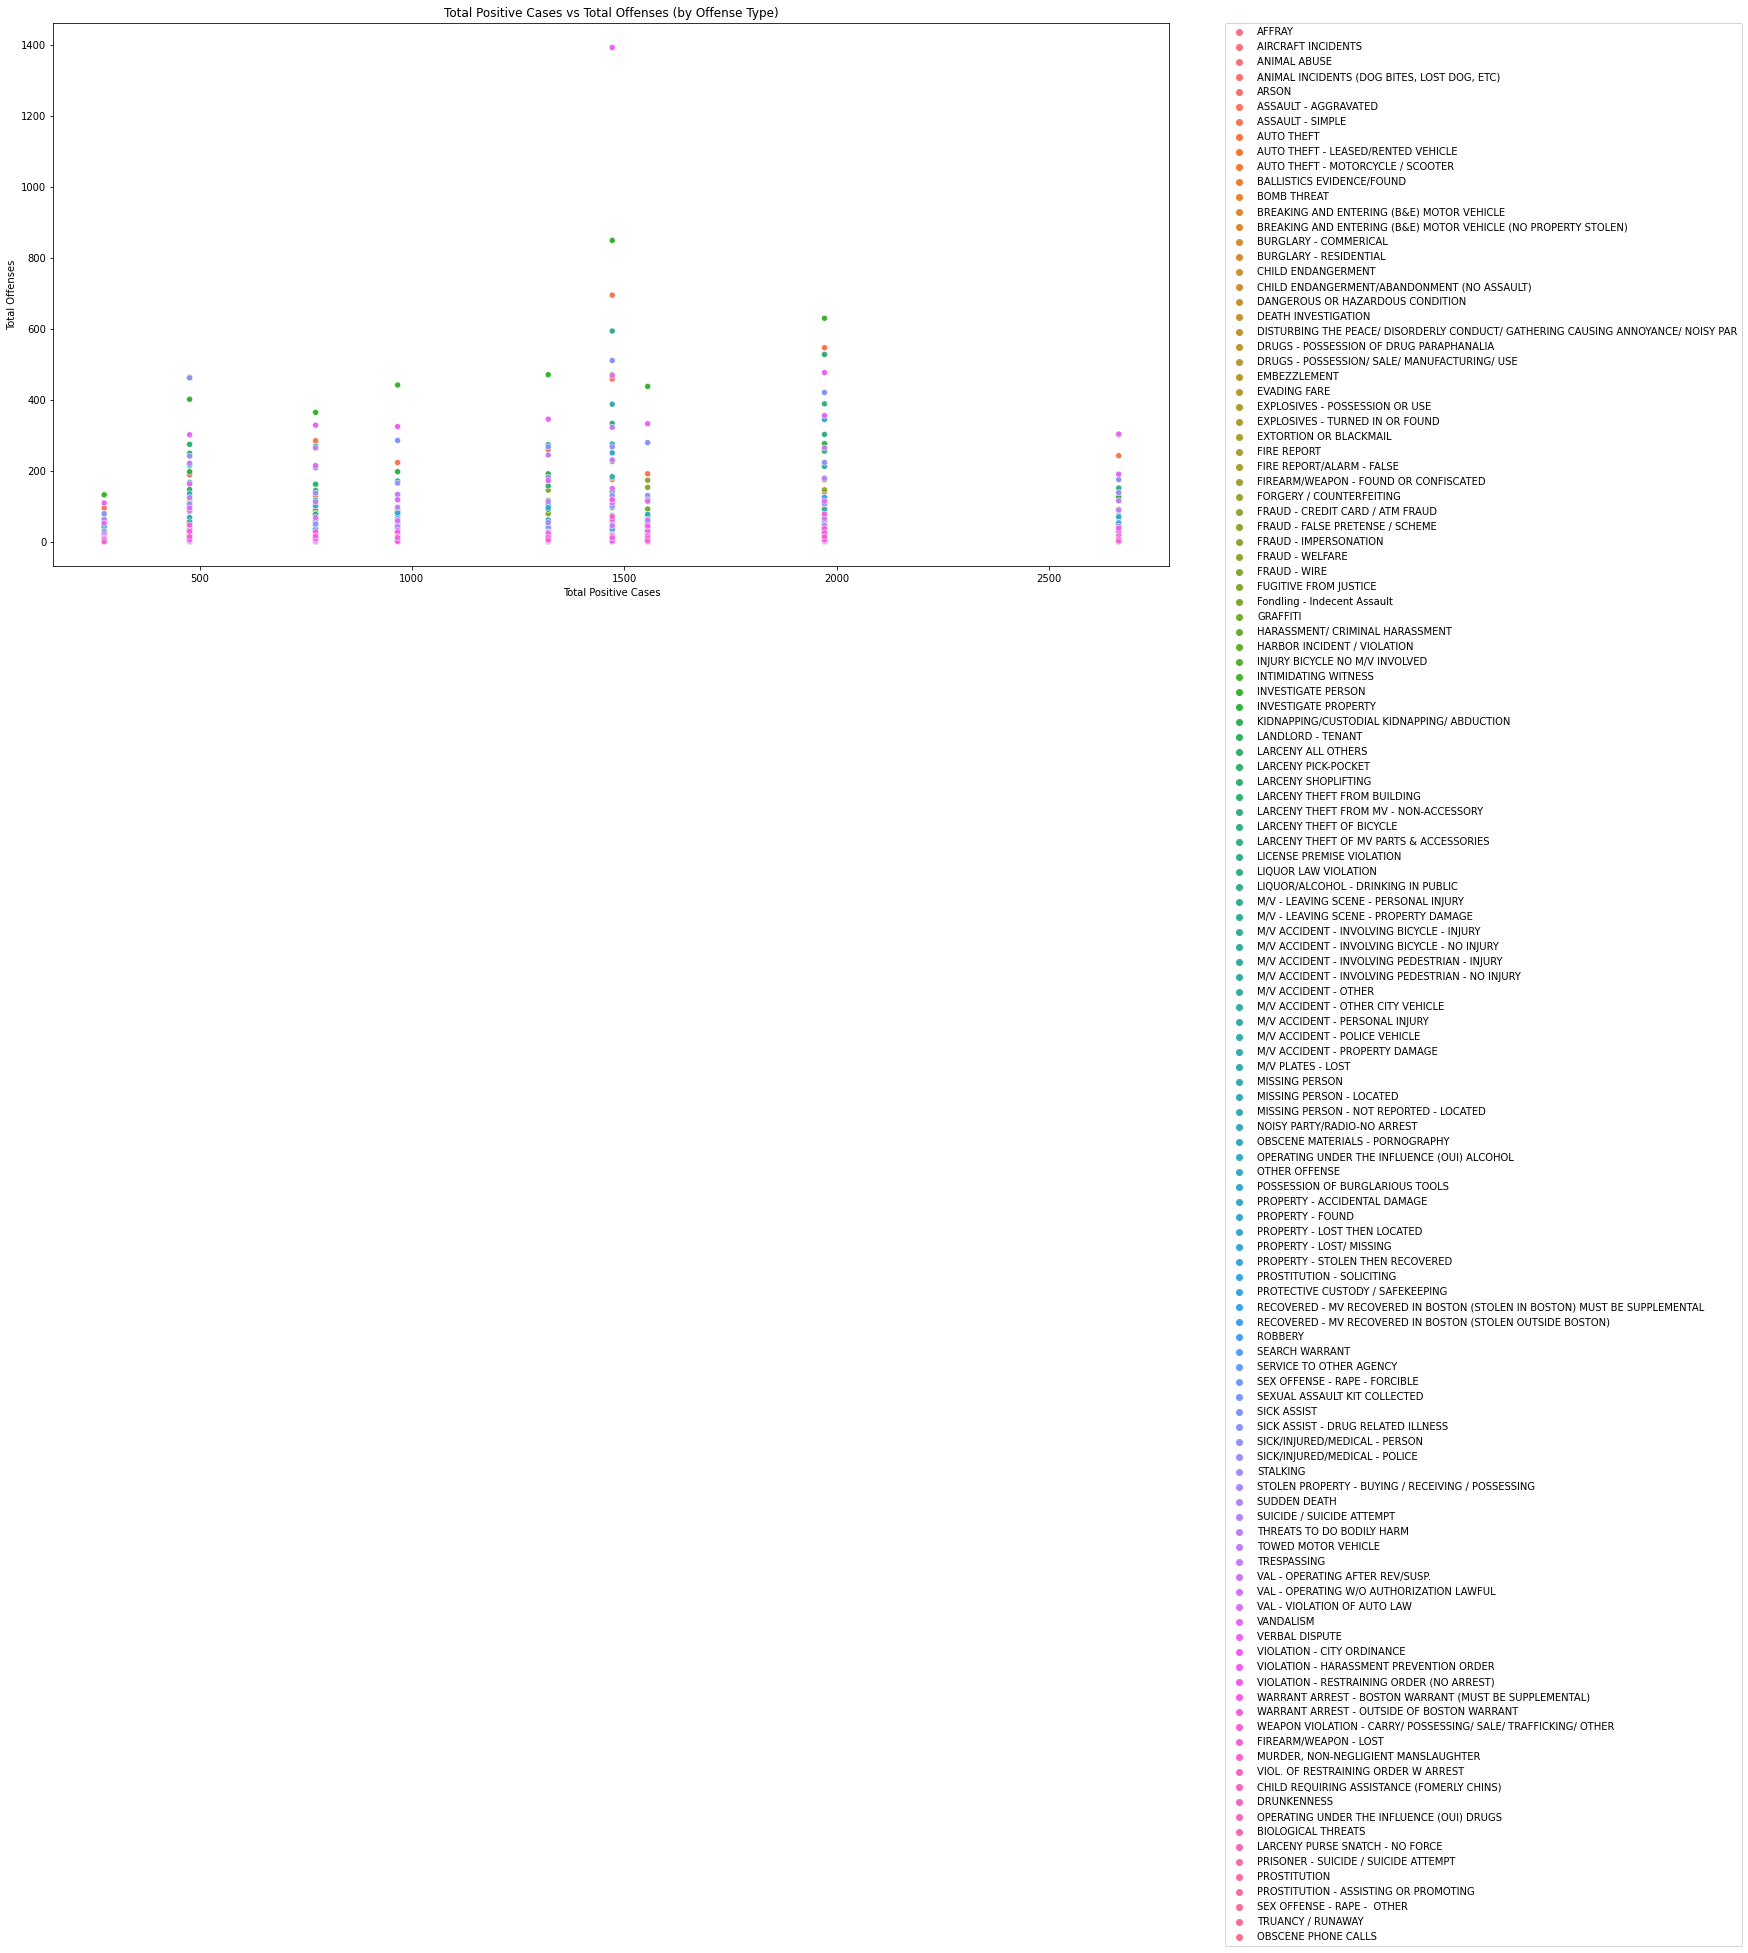

In [77]:
district_crime_covid_by_offense = boston_crime_covid.groupby(["DISTRICT","total positive","total tested","OFFENSE_DESCRIPTION"]).count()["OFFENSE_CODE"].reset_index().rename(columns={"OFFENSE_CODE":"offenses","OFFENSE_DESCRIPTION":"offense_type"})

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=district_crime_covid_by_offense, x="total positive", y="offenses", hue="offense_type", ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title(f"Total Positive Cases vs Total Offenses (by Offense Type)")    
ax.set_ylabel("Total Offenses")
ax.set_xlabel("Total Positive Cases")

Text(0.5, 0, 'Total Test Cases')

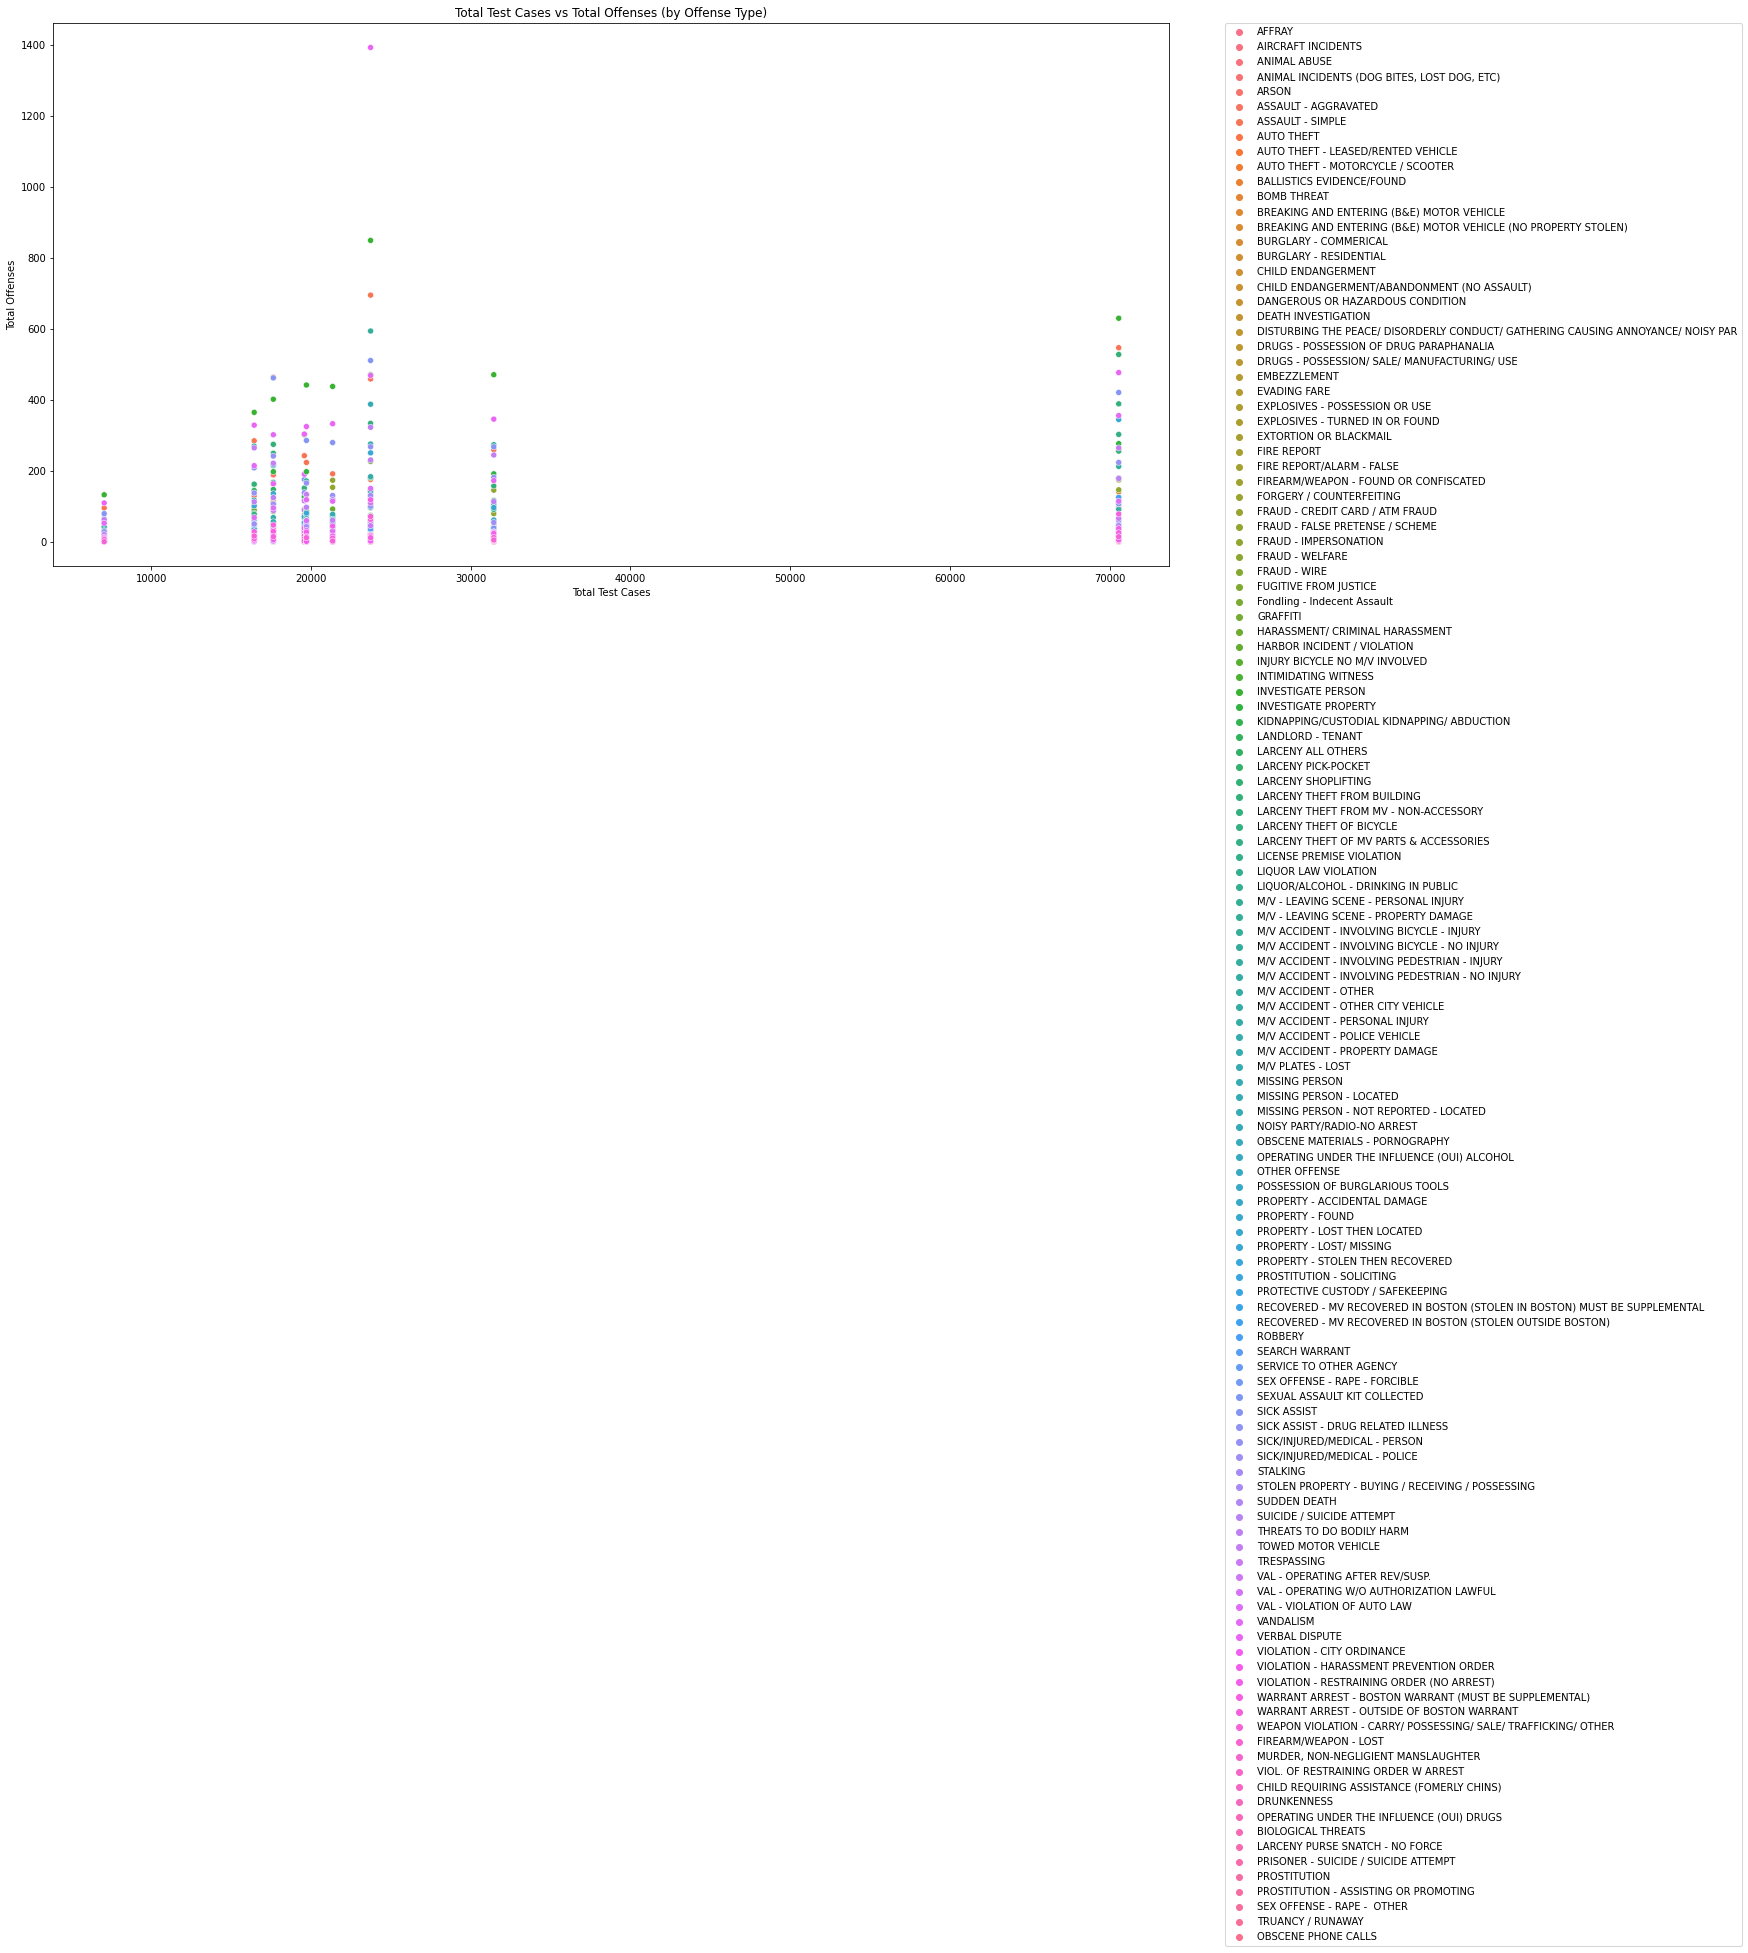

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=district_crime_covid_by_offense, x="total tested", y="offenses", hue="offense_type", ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title(f"Total Test Cases vs Total Offenses (by Offense Type)")    
ax.set_ylabel("Total Offenses")
ax.set_xlabel("Total Test Cases")

In [80]:
unique_offenses = boston_crime_covid.groupby(["OFFENSE_DESCRIPTION"]).count()["OFFENSE_CODE"].sort_values(ascending=False)
unique_offenses

OFFENSE_DESCRIPTION
INVESTIGATE PERSON                       4032
VERBAL DISPUTE                           3780
ASSAULT - SIMPLE                         3006
SICK ASSIST                              2693
VANDALISM                                1993
                                         ... 
PROSTITUTION - ASSISTING OR PROMOTING       3
PROTECTIVE CUSTODY / SAFEKEEPING            3
FIREARM/WEAPON - LOST                       2
OBSCENE PHONE CALLS                         2
BIOLOGICAL THREATS                          1
Name: OFFENSE_CODE, Length: 128, dtype: int64

In [81]:
offense_groups = unique_offenses.index

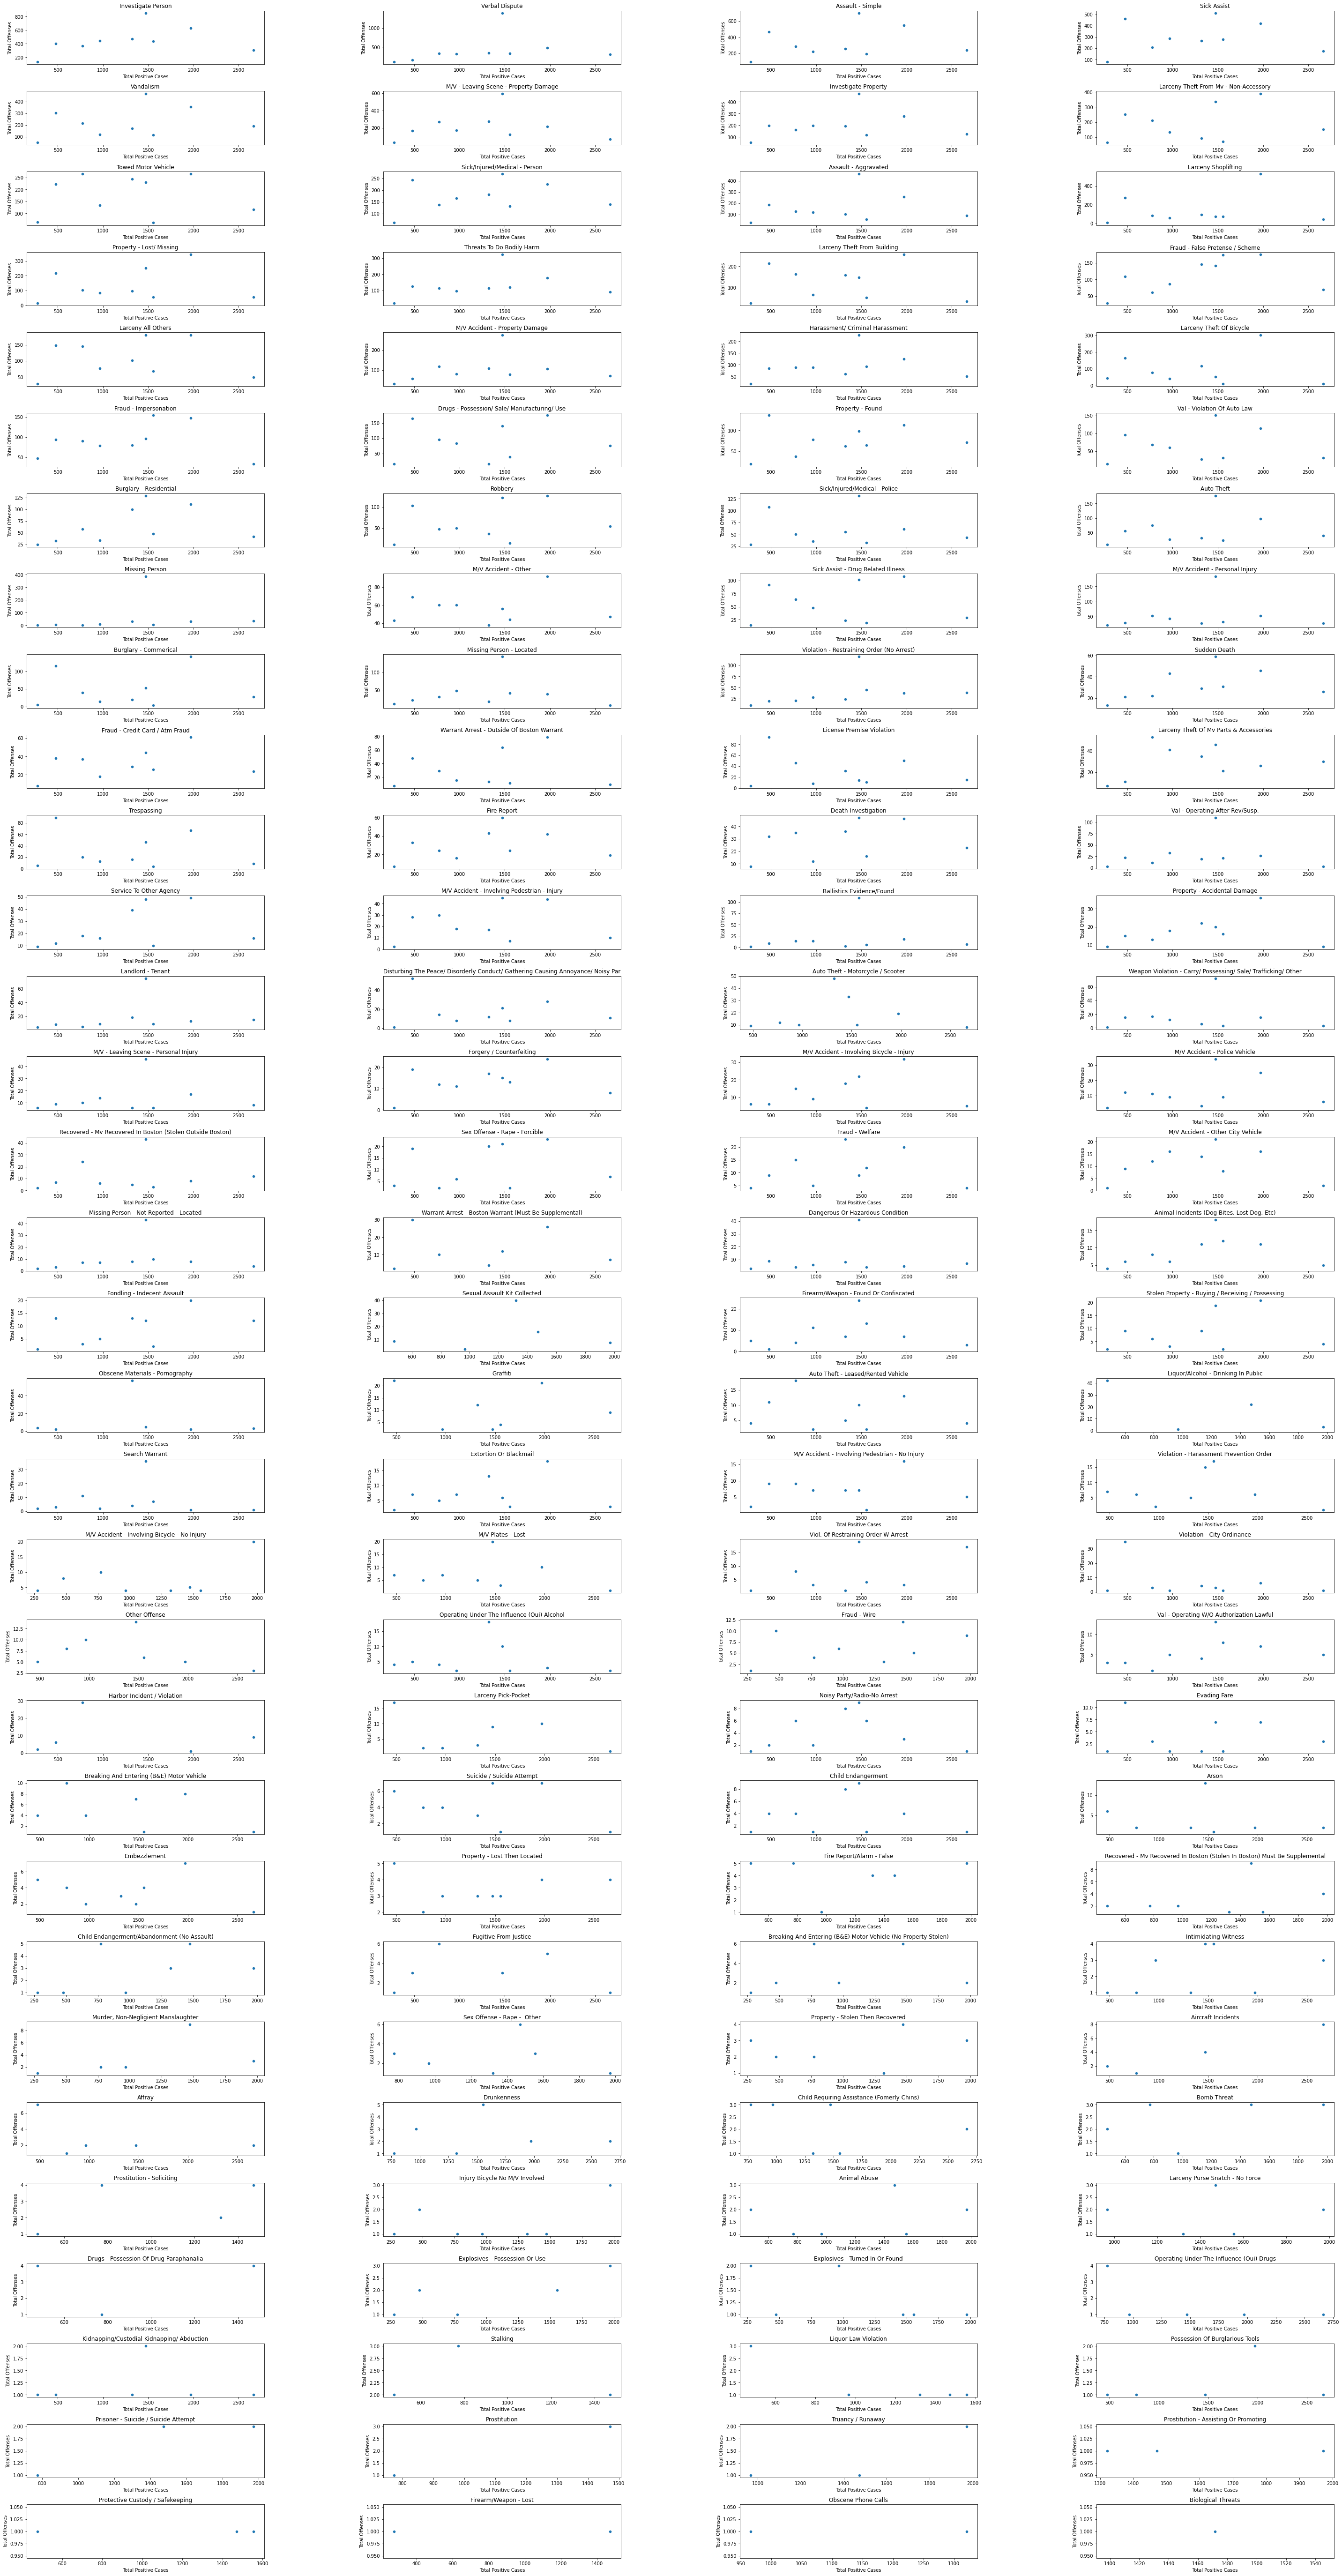

In [91]:
fig, ax = plt.subplots(32,4, figsize=(50,100))
row_idx = 0

for i, offense in enumerate(offense_groups):

  if(i > 0) and (i % 4 == 0):
        row_idx+=1
    
  col= i % 4    
  row = row_idx
  pred_ax = ax[row, col]

  crime_covid_offense = district_crime_covid_by_offense[district_crime_covid_by_offense["offense_type"] == offense]
  sns.scatterplot(data=crime_covid_offense, x="total positive", y="offenses", ax=pred_ax)
  pred_ax.set_title(f"{offense.replace('_',' ').title()}")    
  pred_ax.set_ylabel("Total Offenses")
  pred_ax.set_xlabel("Total Positive Cases")

plt.subplots_adjust(hspace=0.5,wspace=.5)